In [12]:
# Import necessary libraries
import math
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Read the dataset
df = pd.read_csv('encoded_dataset.csv')
df.head()

,Salary,NumberOfVacancies,Flexibility,Remoteness,Region,Vacancy6MonthsOrLess,Department,ClassificationLevel,Animal and Horticulture,Engineering,...,Administration and Business Services,Executive and Senior Management,Program and Project Management,Probation and Parole Officer,Science,Agriculture,Nursing and Midwifery,VacancyType,NumberOfApplicants,Success
0,154922,1.0,0,1,1,0,4,3,0,0,...,1,0,0,0,0,0,0,2,3,0
1,118256,1.0,0,0,3,1,8,1,0,0,...,1,0,0,0,0,0,0,1,18,0
2,118256,1.0,0,0,3,0,0,1,0,0,...,1,0,0,0,0,0,0,1,6,1
3,91927,1.0,0,0,3,0,3,1,0,0,...,0,0,0,0,0,0,0,3,10,1
4,109710,4.0,1,2,0,0,3,0,0,0,...,0,0,0,0,0,0,0,1,17,1


#### Before Data Balancing

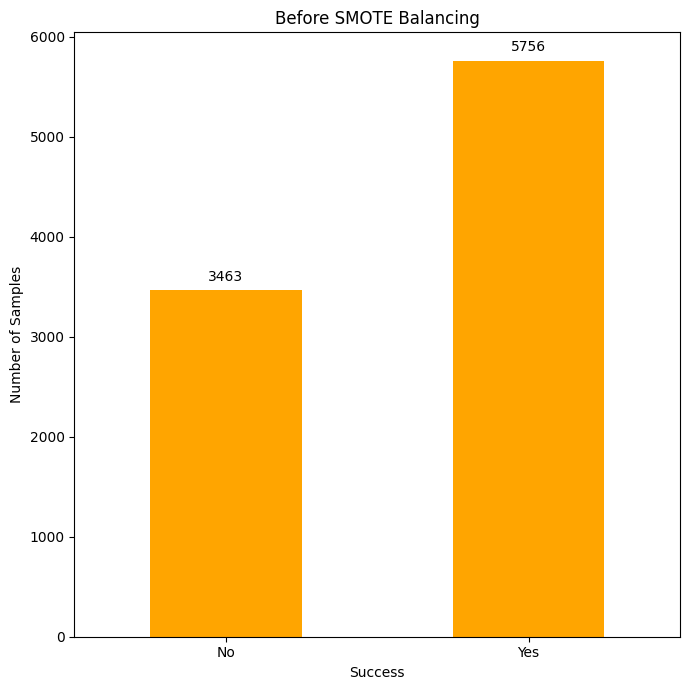

In [14]:
# Check the balance of 2 subsets in the dataset.
label_counts = df['Success'].value_counts().sort_index()  # Ensure the labels are sorted

plt.figure(figsize=(7, 7))
ax = label_counts.plot(kind='bar', color='orange')  # 'ax' captures the plot axes
plt.title('Before SMOTE Balancing')
plt.xlabel('Success')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(2), labels=['No', 'Yes'], rotation=0)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### After SMOTE Balancing

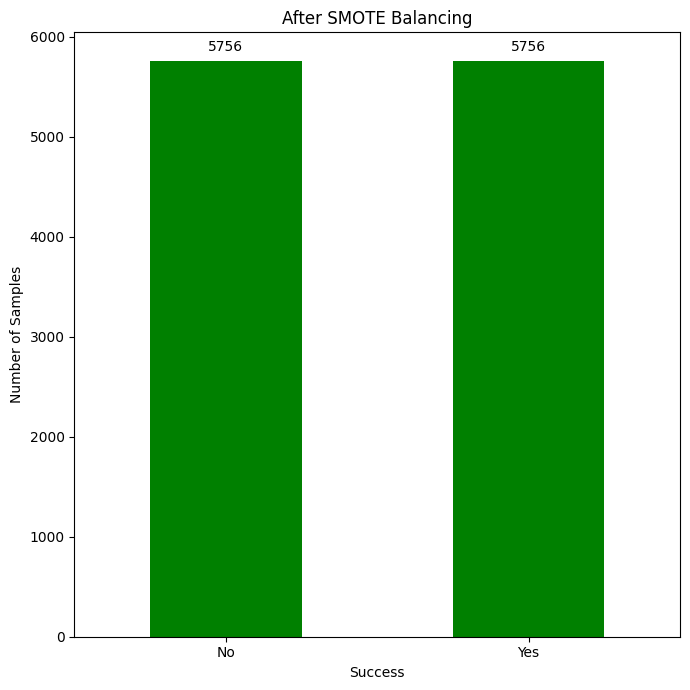

In [15]:
df['Success'] = df['Success'].astype(int)

# Separate feataures and the target variable
X = df.drop('Success', axis=1)
y = df['Success']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df = pd.DataFrame(y_resampled, columns=['Success'])
label_counts_resampled = y_resampled_df['Success'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('After SMOTE Balancing')
plt.xlabel('Success')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(2), labels=['No', 'Yes'], rotation=0)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Model Building

In [16]:
# Function to run Random Forests model
def RF(X, y):
    # For Random Forest, preprocessing like standardisation is not necessary
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Initialise the Random Forest classifier
    rfc = RandomForestClassifier(random_state=0)

    # Applying 5-fold cross-validation
    cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

    # Training the model on the full training data
    rfc.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = rfc.predict(X_test)

    # Evaluation metrics
    accuracy_RF_smote = accuracy_score(y_test, y_pred)
    precision_RF_smote = precision_score(y_test, y_pred, average='macro')
    recall_RF_smote = recall_score(y_test, y_pred, average='macro')
    f1_RF_smote = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy_RF_smote)
    print("Precision:", precision_RF_smote)
    print("Recall:", recall_RF_smote)
    print("F1-Score:", f1_RF_smote)

    return accuracy_RF_smote, precision_RF_smote, recall_RF_smote, f1_RF_smote

In [17]:
# Call the function
accuracy_RF_smote, precision_RF_smote, recall_RF_smote, f1_RF_smote = RF(X_resampled, y_resampled)

Accuracy: 0.7442466348241424
Precision: 0.74406955650334
Recall: 0.744101607369538
F1-Score: 0.744084317448818


In [18]:
# List of features in the order provided
feature_order = [
    'NumberOfApplicants', 'Salary', 'Department', 'VacancyType', 'ClassificationLevel', 'Region',
    'NumberOfVacancies', 'Remoteness', 'Vacancy6MonthsOrLess', 'Administration and Business Services',
    'Flexibility', 'Education and Training', 'Allied Health and Health Care Services',
    'Nursing and Midwifery', 'Accounting and Finance', 'Professional',
    'Information and Communication Technology (ICT)', 'Environment', 'Child Protection',
    'Community Services', 'Program and Project Management', 'Medical', 'Legal',
    'Human Resources and Work Health Safety', 'Trades', 'Aged and Disability Care', 'Communication',
    'Procurement', 'Agriculture', 'Executive and Senior Management',
    'Information and Records Management', 'Engineering', 'Tourism and Culture',
    'Prison Services', 'Construction', 'Police', 'Probation and Parole Officer',
    'Hospitality and Food Services', 'Transport and Logistics', 'Social Work',
    'Primary Industry', 'Housekeeping Services', 'Science', 'Payroll', 'Sport and Recreation',
    'Traineeship', 'Vacation Employment', 'Fire and Emergency Workers',
    'Grants and Contract Management', 'Maintenance and Services', 'Media and Public Relations',
    'Architecture and Design', 'Animal and Horticulture', 'Natural Resources and Conservation',
    'Cadetship and Graduate Programs'
]

In [19]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Select the first 8 features based on the forward selection results
selected_8_features = feature_order[:8]

# Print the selected 8 features
print("Selected Features (First 8):")
for feature in selected_8_features:
    print(feature)

# Create a subset of the data with the selected 8 features
X_train_subset = X_train[selected_8_features]
X_test_subset = X_test[selected_8_features]

# Initialize and train the Random Forest model
rfc_smote = RandomForestClassifier(random_state=0)
rfc_smote.fit(X_train_subset, y_train)

# Predict on the test set
y_pred = rfc_smote.predict(X_test_subset)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nEvaluation Metrics for Model with 8 Most Significant Features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Selected Features (First 8):
NumberOfApplicants
Salary
Department
VacancyType
ClassificationLevel
Region
NumberOfVacancies
Remoteness

Evaluation Metrics for Model with 8 Most Significant Features:
Accuracy: 0.7390
Precision: 0.7389
Recall: 0.7387
F1-Score: 0.7388


#### Test prediction

##### Case 1:
- Number of applicants: 3
- Salary: $80k
- Department: Department of Health
- Vacancy type: Ongoing (Pemanent) - Full Time
- Classification level: First management
- Region: Central Region
- Number of vacancies: 1
- Remoteness: Very remote

In [21]:
# Create a DataFrame with the feature values and the correct feature names
test_data = pd.DataFrame({
    'NumberOfApplicants': [3],
    'Salary': [80000],
    'Department': [3],
    'VacancyType': [3],
    'ClassificationLevel': [2],
    'Region': [1],
    'NumberOfVacancies': [1],
    'Remoteness': [2]
})

# Use the model to make a prediction
prediction = rfc_smote.predict(test_data)

# Print the predicted result
print(f"The predicted value for the 'Success' column is: {prediction[0]}")

The predicted value for the 'Success' column is: 1


##### Case 2:
- Number of applicants: 18
- Salary: $120k
- Department: Department of Trade Business and Innovation
- Vacancy type: Fixed (Temporary) - Full Time
- Classification level: Intermediate
- Region: Darwin Region
- Number of vacancies: 1
- Remoteness: Outer Regional

In [36]:
# Create a DataFrame with the feature values and the correct feature names
test_data2 = pd.DataFrame({
    'NumberOfApplicants': [18],
    'Salary': [120000],
    'Department': [8],
    'VacancyType': [1],
    'ClassificationLevel': [1],
    'Region': [3],
    'NumberOfVacancies': [1],
    'Remoteness': [0]
})

# Use the model to make a prediction
prediction = rfc_smote.predict(test_data2)

# Print the predicted result
print(f"The predicted value for the 'Success' column is: {prediction[0]}")

The predicted value for the 'Success' column is: 0
